In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading in the dataset

df = pd.read_csv(r'C:\Users\seunt\Downloads\SUPERVISE ML UDEMY\datasets\baseballplayer.csv')

df.head()

,Angle,Distance
0,10,115.6
1,15,157.2
2,20,189.2
3,24,220.8
4,30,253.8


In [3]:
# now let's split the data into dependent and independent features

x = df.iloc[0: , 0] # independent feature

y = df.iloc[0: , 1] # dependent feature

In [4]:
#x.head()

In [5]:
#y.head()

In [6]:
# training time

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

In [7]:
# now let's create an instance for the linear regression model

lin_reg = LinearRegression()

In [8]:
#If you want to reshape the data, you should first extract the values from the Pandas Series or DataFrame and then reshape them.

x_train_values = X_train.values
x_test_values = X_test.values
y_train_values = Y_train.values
y_test_values = Y_test.values

# Reshape the values
x_train1 = np.reshape(x_train_values, (-1, 1))
x_test1 = np.reshape(x_test_values, (-1, 1))

y_train1 = np.reshape(y_train_values, (-1, 1))
y_test1 = np.reshape(y_test_values, (-1, 1))

# you remember in the numpy.reshape, one of the argument is to specify the 2-D array you want to convert your 1-D array into
# but since we can't possible be counting the rows, imagine having a million rows, so we specify -1 to tell python to take care
# of the rows itself, and since we have just 1 columnn, we put just 1 for the other one. Hence the reason why we have (-1, 1)
# the -1 is for the rows and the 1 is for the column.

In [9]:
# now we can fit our model to the training data

lin_reg.fit(x_train1, y_train1)

LinearRegression()

In [10]:
# now let's predict

y_pred = lin_reg.predict(x_train1)

y_pred1 = lin_reg.predict(x_test1)

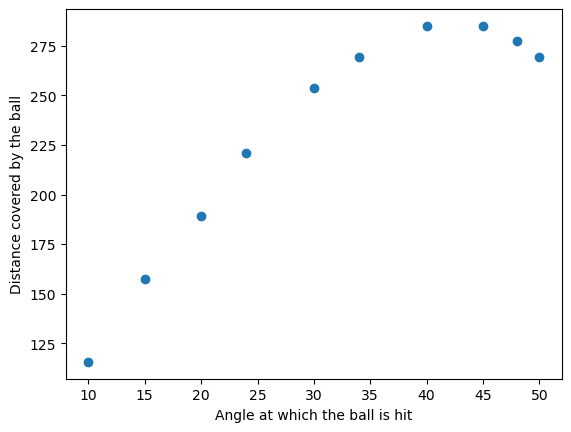

In [11]:
# let's visualize our data on a scatter plot for the entire data.

plt.scatter(x, y, cmap = 'red')
plt.xlabel('Angle at which the ball is hit')
plt.ylabel('Distance covered by the ball')

plt.show()

- From the plot above, we can see that our data is distributed in the form of a curve and not in a linear form. We will go ahead to plot the regression line to see if it's going to fit on the data points.

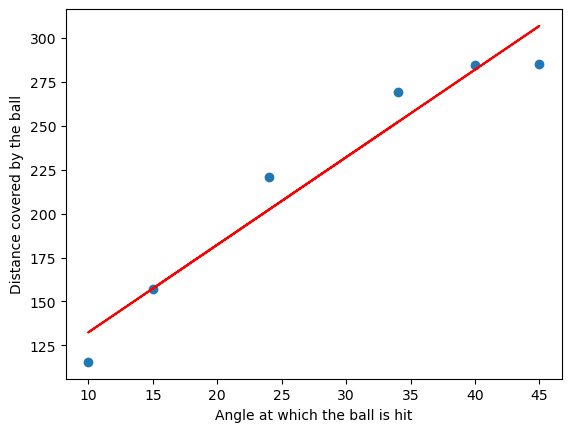

In [12]:
# now let's plot the regression line and see how it fits the training data points

plt.scatter(x_train1, y_train1, cmap = 'red')
plt.plot(x_train1, y_pred, color = 'red')
plt.xlabel('Angle at which the ball is hit')
plt.ylabel('Distance covered by the ball')

plt.show()

- From the plot above, we can see that the regression line fails to fit well on the data points, there is a huge difference between the actual data points and the predicted data points. This is a problem of underfitting where the model fails to perform well on the training data.

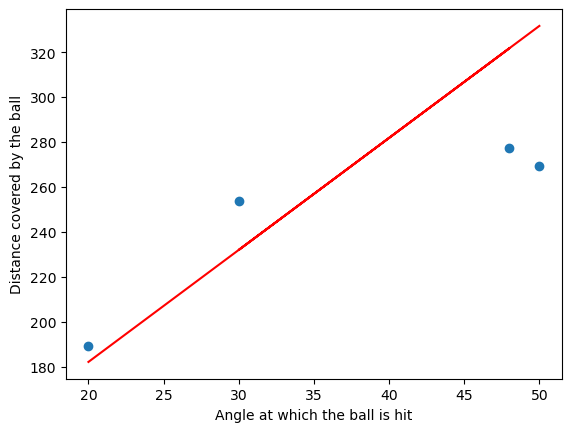

In [13]:
# let's visualize the regression line on the testing data as well

plt.scatter(x_test1, y_test1, cmap = 'red')
plt.plot(x_test1, y_pred1, color = 'red')
plt.xlabel('Angle at which the ball is hit')
plt.ylabel('Distance covered by the ball')

plt.show()

- From the plot above, we can also see that the model fail to perform well on the testing data is well. As said earllier, this is a problem of UNDERFITTING where the model fails to perform well on training data as well as the testing data.

In [14]:
# let's calculate the r-squared value for both the training and testing data to see the performance of the model in value

r_squared_training = r2_score(y_train1, y_pred)

r_squared_testing = r2_score(y_test1, y_pred1)

In [15]:
r_squared_training

0.9450683561216716

In [16]:
r_squared_testing

-0.3289262875726202

## Now since our Data point is distributed in a curvilnear manner, we are going to APPLY the PLOYNOMIA EQUATION ON THE DATA POINTS BY LEVERAGING THE MODULE PolymialFeatures in the Sklearn library.

- now let's transform the independent variable, remember in the ploynomial equation, we are only transforming the independent
 variable and not the dependent variable. The dependent variable stays in it's form



In [17]:
# let's first reshape the indepent variable x to 2-D

x1 = np.reshape(x.values, (-1, 1))
y1 = np.reshape(y.values, (-1, 1))

In [18]:
# let's create an instance for the polynomial features

poly_reg = PolynomialFeatures(degree = 2) # you need to specify the degree

trans_x = poly_reg.fit_transform(x1)

In [19]:
lin_reg.fit(trans_x, y1)

LinearRegression()

In [20]:
y_pred3 = lin_reg.predict(trans_x)

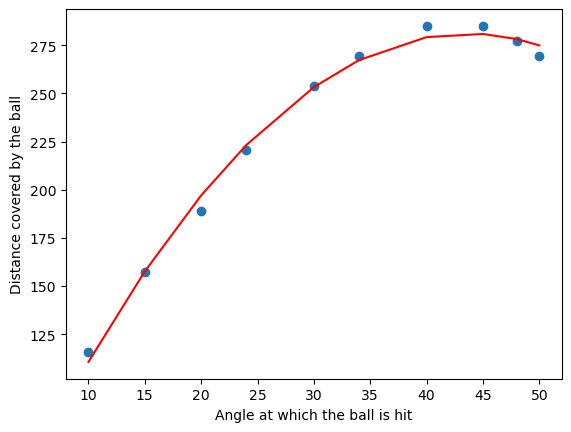

In [21]:
# let's visualize our data on a scatter plot for the entire data.

plt.scatter(x1, y1, cmap = 'red')
plt.plot(x1, y_pred3, color = 'red')
plt.xlabel('Angle at which the ball is hit')
plt.ylabel('Distance covered by the ball')

plt.show()

In [22]:
r_squared3 = r2_score(y1, y_pred3)

r_squared3

0.9944299520860511